In [2]:
import numpy as np
import pandas as pd 
import json

In [5]:
with open("example.json") as datafile:
  data = json.load(datafile)

In [10]:
pose = data['people'][0]['pose_keypoints_2d']
pose

[86.256,
 168.046,
 0.831811,
 111.55,
 147.275,
 0.396076,
 111.546,
 157.658,
 0.239492,
 0,
 0,
 0,
 0,
 0,
 0,
 111.548,
 142.062,
 0.656791,
 131.697,
 170.029,
 0.785221,
 120.66,
 197.939,
 0.763975,
 175.204,
 141.426,
 0.364227,
 173.901,
 149.219,
 0.290487,
 229.106,
 147.901,
 0.519497,
 282.367,
 160.262,
 0.471297,
 176.5,
 133.654,
 0.317391,
 227.157,
 156.356,
 0.635373,
 279.131,
 162.86,
 0.51896,
 81.0678,
 168.068,
 0.303263,
 85.5668,
 162.871,
 0.893983,
 0,
 0,
 0,
 90.784,
 148.597,
 0.761016,
 284.322,
 179.734,
 0.472286,
 287.555,
 177.801,
 0.414428,
 287.552,
 158.981,
 0.268498,
 280.419,
 179.738,
 0.256466,
 278.458,
 175.858,
 0.20977,
 290.15,
 157.026,
 0.339514]

In [14]:
xi = [i for i in range(0,75,3)]
yi = [j for j in range(1,75, 3)]
ci = [k for k in range(2,75, 3)]
x = []
y = []
c = []

for index in range(0,75):
    if index in xi:
        x.append(pose[index])
    elif index in yi:
        y.append(pose[index])
    else:
        c.append(pose[index])        

In [39]:
coord = np.array([x,y]).transpose()
coord

array([[ 86.256 , 168.046 ],
       [111.55  , 147.275 ],
       [111.546 , 157.658 ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [111.548 , 142.062 ],
       [131.697 , 170.029 ],
       [120.66  , 197.939 ],
       [175.204 , 141.426 ],
       [173.901 , 149.219 ],
       [229.106 , 147.901 ],
       [282.367 , 160.262 ],
       [176.5   , 133.654 ],
       [227.157 , 156.356 ],
       [279.131 , 162.86  ],
       [ 81.0678, 168.068 ],
       [ 85.5668, 162.871 ],
       [  0.    ,   0.    ],
       [ 90.784 , 148.597 ],
       [284.322 , 179.734 ],
       [287.555 , 177.801 ],
       [287.552 , 158.981 ],
       [280.419 , 179.738 ],
       [278.458 , 175.858 ],
       [290.15  , 157.026 ]])

In [3]:
BODY_POINTS = {
    "Nose":  0,
    "Neck": 1,
    "RShoulder": 2,
    "RElbow": 3,
    "RWrist": 4,
    "LShoulder": 5,
    "LElbow": 6,
    "LWrist": 7,
    "MidHip": 8,
    "RHip": 9,
    "RKnee": 10,
    "RAnkle": 11,
    "LHip": 12,
    "LKnee": 13,
    "LAnkle": 14,
    "REye": 15,
    "LEye": 16,
    "REar": 17,
    "LEar": 18,
    "LBigToe": 19,
    "LSmallToe": 20,
    "LHeel": 21,
    "RBigToe": 22,
    "RSmallToe": 23,
    "RHeel": 24
    }

In [4]:
'''Calculate the centre of the pose, define as the midpoint between point the neck and the mid hip'''
def get_pose_center(coordinates):
    center = (coordinates[BODY_POINTS['MidHip']]+coordinates[BODY_POINTS['Neck']])/2
    return center 

In [5]:
'''Calculates pose size. It is the maximum of two values:
      * Torso size multiplied by `torso_size_multiplier`
      * Maximum distance from pose center to any pose landmark'''

def get_pose_size(coordinates, torso_size_multiplier):
    # This approach uses only 2D landmarks to compute pose size.
    coordinates = coordinates[:,:2]

    # Hips centre.
    hips_center = coordinates[BODY_POINTS['MidHip']]

    # Shoulders centre.
    shoulders_center = coordinates[BODY_POINTS['Neck']]

    # Torso size as the minimum body size.
    torso_size = np.linalg.norm(shoulders - hips)

    # Max dist to pose center.
    pose_center= get_pose_center(coordinates)
    max_dist = np.max(np.linalg.norm(coordinates - pose_center, axis=1))

    return max(torso_size * torso_size_multiplier, max_dist)


In [4]:
'''Calculates the distance between two body parts'''
def get_distance(coordinates, body_part1, body_part2):
    bp1 = coordinates[BODY_POINTS[body_part1]]
    bp2 = coordinates[BODY_POINTS[body_part2]]
    distance = ((bp1-bp2)*(bp1-bp2)).sum() ** 0.5
    return distance

In [41]:
get_distance(coord, "Nose", "Neck")

32.72951079683287

In [84]:
dist_wrist_shoulder=[]
dist_knee_hip=[]
for ind in range(0,72):
    if ind < 10:
        file_name = f'v_PushUps_g03_c01_00000000000{ind}_keypoints.json'
    else:
        file_name = f'v_PushUps_g03_c01_0000000000{ind}_keypoints.json'
    
    path = "data/" + file_name
     
    with open(path) as datafile:
        data = json.load(datafile)
    
    pose = data['people'][0]['pose_keypoints_2d']
    
    xi = [i for i in range(0,75,3)]
    yi = [j for j in range(1,75, 3)]
    ci = [k for k in range(2,75, 3)]
    x = []
    y = []
    c = []

    for index in range(0,75):
        if index in xi:
            x.append(pose[index])
        elif index in yi:
            y.append(pose[index])
        else:
            c.append(pose[index])
    
    coord = np.array([x,y]).transpose()
    dist_wrist_shoulder.append(get_distance(coord, "LWrist", "LShoulder"))
    dist_knee_hip.append(get_distance(coord,'LKnee','LHip'))

In [61]:
dist_knee_hip

[0.0,
 54.419914737162166,
 51.447879742512214,
 53.479096710771024,
 51.69923845667362,
 54.598370122193195,
 56.35703287079617,
 53.21531954240243,
 54.07578593973462,
 55.51137228532547,
 55.02486660592645,
 55.053020089728044,
 52.80552531695901,
 54.43132180096308,
 54.226664667855054,
 53.60749956862379,
 54.23499177652746,
 54.42943656699009,
 53.207007358053865,
 53.8151486572322,
 56.6777330880479,
 52.18761178670662,
 53.26129628538908,
 54.61327740577379,
 58.961896009202405,
 55.61582301827422,
 57.10367050374257,
 57.29318291908732,
 58.97999235333962,
 56.961285115418505,
 58.0267607401964,
 55.968766236178574,
 56.93378794705302,
 55.26524993157997,
 53.56147070422917,
 54.88094031628833,
 53.411702697068165,
 55.84885117887385,
 54.98723562791643,
 54.32952866535841,
 54.04760664451296,
 53.27046357973617,
 52.467586813193535,
 51.80542398243644,
 55.19682357708639,
 53.26677036389574,
 53.79968375371735,
 53.013471806702114,
 50.915837074529165,
 49.397822340665996,
 5

In [5]:
import matplotlib.pyplot as plt

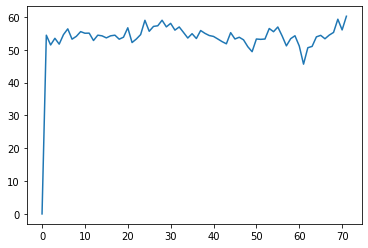

In [85]:
plt.plot(dist_knee_hip)

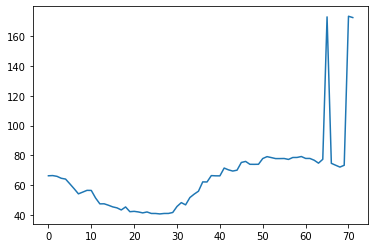

In [86]:
plt.plot(dist_wrist_shoulder)

In [83]:
dist_wrist_shoulder2=[]
dist_knee_hip2=[]
for l in range(0,72):
    if l < 10:
        file_name = f'v_PushUps_g19_c01_00000000000{l}_keypoints.json'
    else:
        file_name = f'v_PushUps_g19_c01_0000000000{l}_keypoints.json'
    
    path = "data/" + file_name
    
    if l != 66:
        with open(path) as datafile:
            data = json.load(datafile)
   
    pose = data['people'][0]['pose_keypoints_2d']
    
    xi = [i for i in range(0,75,3)]
    yi = [j for j in range(1,75, 3)]
    ci = [k for k in range(2,75, 3)]
    x = []
    y = []
    c = []

    for index in range(0,75):
        if index in xi:
            x.append(pose[index])
        elif index in yi:
            y.append(pose[index])
        else:
            c.append(pose[index])
    
    coord = np.array([x,y]).transpose()
    dist_wrist_shoulder2.append(get_distance(coord, "RWrist", "RShoulder"))
    dist_knee_hip2.append(get_distance(coord,'RKnee','RHip'))

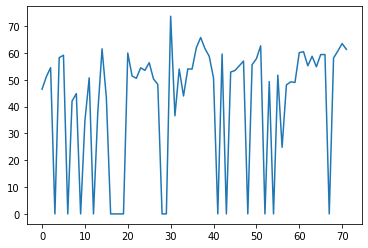

In [87]:
plt.plot(dist_knee_hip2)

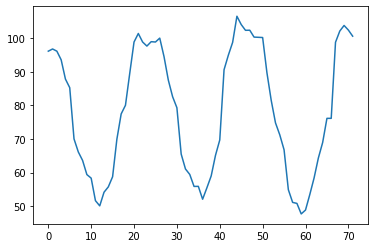

In [88]:
plt.plot(dist_wrist_shoulder2)

In [97]:
dist_wrist_shoulder3=[]
dist_knee_hip3=[]
for l in range(0,75):
    if l < 10:
        file_name = f'v_PushUps_g19_c03_00000000000{l}_keypoints.json'
    else:
        file_name = f'v_PushUps_g19_c03_0000000000{l}_keypoints.json'
    
    path = "data/" + file_name
    
    with open(path) as datafile:
        data = json.load(datafile)
        
    if len(data['people'])>0 :   
        pose = data['people'][0]['pose_keypoints_2d']
    
    
        xi = [i for i in range(0,75,3)]
        yi = [j for j in range(1,75, 3)]
        ci = [k for k in range(2,75, 3)]
        x = []
        y = []
        c = []

        for index in range(0,75):
            if index in xi:
                x.append(pose[index])
            elif index in yi:
                y.append(pose[index])
            else:
                c.append(pose[index])
    
        coord = np.array([x,y]).transpose()
        dist_wrist_shoulder3.append(get_distance(coord, "RWrist", "RShoulder"))
        dist_knee_hip3.append(get_distance(coord,'RKnee','RHip'))

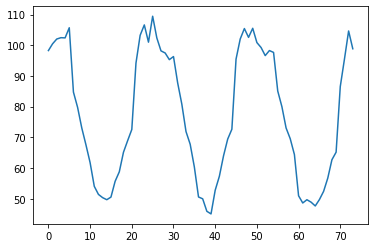

In [98]:
plt.plot(dist_wrist_shoulder3)

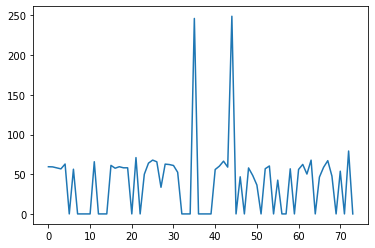

In [99]:
plt.plot(dist_knee_hip3)

In [ ]:
v_JumpingJack_g01_c01_000000000091_keypoints.json

In [8]:
dist_wrist_shoulder4=[]
dist_knee_hip4=[]
dist_wrists = []
dist_ankles = []

for l in range(0,92):
    if l < 10:
        file_name = f'v_JumpingJack_g01_c01_00000000000{l}_keypoints.json'
    else:
        file_name = f'v_JumpingJack_g01_c01_0000000000{l}_keypoints.json'
    
    path = "data/" + file_name
    
    with open(path) as datafile:
        data = json.load(datafile)
        
    if len(data['people'])>0 :   
        pose = data['people'][0]['pose_keypoints_2d']
    
    
        xi = [i for i in range(0,75,3)]
        yi = [j for j in range(1,75, 3)]
        ci = [k for k in range(2,75, 3)]
        x = []
        y = []
        c = []

        for index in range(0,75):
            if index in xi:
                x.append(pose[index])
            elif index in yi:
                y.append(pose[index])
            else:
                c.append(pose[index])
    
        coord = np.array([x,y]).transpose()
        dist_wrist_shoulder4.append(get_distance(coord, "RWrist", "RShoulder"))
        dist_knee_hip4.append(get_distance(coord,'RKnee','RHip'))
        dist_wrists.append(get_distance(coord, "RWrist", "LWrist"))
        dist_ankles.append(get_distance(coord,'RAnkle','LAnkle'))

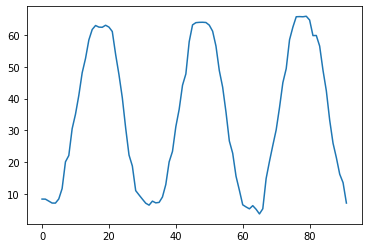

In [9]:
plt.plot(dist_ankles)

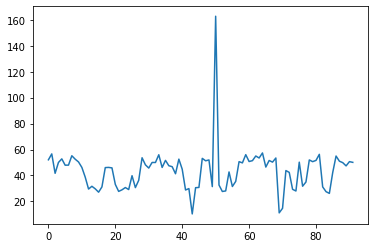

In [10]:
plt.plot(dist_wrist_shoulder4)

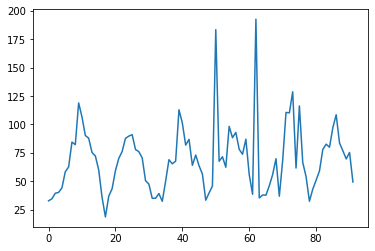

In [11]:
plt.plot(dist_wrists)

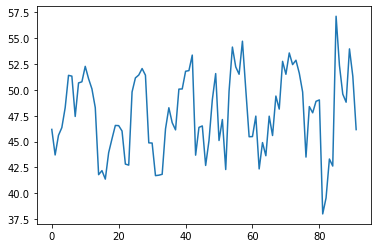

In [12]:
plt.plot(dist_knee_hip4)

In [14]:
dist_wrist_shoulder5=[]
dist_knee_hip5=[]
dist_shoulder_hip = []
for l in range(0,51):
    if l < 10:
        file_name = f'v_PushUps_g13_c03_00000000000{l}_keypoints.json'
    else:
        file_name = f'v_PushUps_g13_c03_0000000000{l}_keypoints.json'
    
    path = "data/" + file_name
    
    with open(path) as datafile:
        data = json.load(datafile)
    
    if len(data['people'])>0 :  
        
        pose = data['people'][0]['pose_keypoints_2d']
    
        xi = [i for i in range(0,75,3)]
        yi = [j for j in range(1,75, 3)]
        ci = [k for k in range(2,75, 3)]
        x = []
        y = []
        c = []

        for index in range(0,75):
            if index in xi:
                x.append(pose[index])
            elif index in yi:
                y.append(pose[index])
            else:
                c.append(pose[index])
    
        coord = np.array([x,y]).transpose()
        dist_wrist_shoulder5.append(get_distance(coord, "RWrist", "RShoulder"))
        dist_knee_hip5.append(get_distance(coord,'RKnee','RHip'))
        dist_shoulder_hip.append(get_distance(coord, 'RShoulder', 'RHip'))

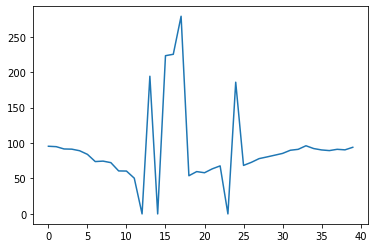

In [15]:
plt.plot(dist_wrist_shoulder5)

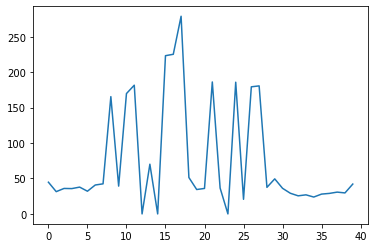

In [16]:
plt.plot(dist_shoulder_hip)